In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

Swedish crime rates dataset taken from Kaggle

In [2]:
df = pd.read_csv('reported.csv')

In [3]:
df.shape

(66, 21)

In [4]:
df.dtypes

Year                      int64
crimes.total              int64
crimes.penal.code         int64
crimes.person             int64
murder                    int64
assault                   int64
sexual.offenses           int64
rape                      int64
stealing.general          int64
burglary                  int64
house.theft             float64
vehicle.theft           float64
out.of.vehicle.theft    float64
shop.theft              float64
robbery                   int64
fraud                     int64
criminal.damage           int64
other.penal.crimes        int64
narcotics               float64
drunk.driving             int64
population                int64
dtype: object

In [5]:
df.head(5)

,Year,crimes.total,crimes.penal.code,crimes.person,murder,assault,sexual.offenses,rape,stealing.general,burglary,...,vehicle.theft,out.of.vehicle.theft,shop.theft,robbery,fraud,criminal.damage,other.penal.crimes,narcotics,drunk.driving,population
0,1950,2784,2306,120,1,105,40,5,1578,295,...,NaN,NaN,NaN,3,209,72,477,0.0,49,7014000
1,1951,3284,2754,125,1,109,45,6,1899,342,...,NaN,NaN,NaN,3,310,73,530,0.0,66,7073000
2,1952,3160,2608,119,1,104,39,4,1846,372,...,NaN,NaN,NaN,3,217,82,553,0.0,78,7125000
3,1953,2909,2689,119,1,105,45,5,1929,361,...,NaN,NaN,NaN,4,209,88,220,0.0,91,7171000
4,1954,3028,2791,126,1,107,41,5,1981,393,...,NaN,NaN,NaN,4,236,101,237,0.0,103,7213000


In [6]:
df.describe()

,Year,crimes.total,crimes.penal.code,crimes.person,murder,assault,sexual.offenses,rape,stealing.general,burglary,...,vehicle.theft,out.of.vehicle.theft,shop.theft,robbery,fraud,criminal.damage,other.penal.crimes,narcotics,drunk.driving,population
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,...,59.000000,51.000000,51.000000,66.000000,66.000000,66.000000,66.000000,62.000000,66.000000,6.600000e+01
mean,1982.500000,10084.257576,8695.181818,451.287879,1.757576,423.106061,75.318182,20.045455,5580.545455,1240.681818,...,466.288136,1192.568627,540.294118,48.060606,730.636364,879.484848,1383.303030,386.629032,225.757576,8.341848e+06
std,19.196354,4223.893287,3582.148938,295.041002,0.724529,281.839023,48.136396,19.147550,2089.329161,456.699806,...,193.701161,432.536438,185.298710,35.412679,395.296097,605.272253,717.521867,307.130945,66.349902,7.179351e+05
min,1950.000000,2784.000000,2306.000000,119.000000,1.000000,104.000000,29.000000,4.000000,1578.000000,295.000000,...,135.000000,542.000000,123.000000,3.000000,209.000000,72.000000,220.000000,0.000000,49.000000,7.014000e+06
25%,1966.250000,6152.500000,5336.000000,185.250000,1.000000,167.750000,41.000000,8.000000,3786.750000,918.250000,...,339.500000,753.500000,379.000000,13.250000,476.500000,301.250000,816.750000,201.250000,178.000000,7.823000e+06
50%,1982.500000,11654.000000,9637.000000,370.500000,2.000000,345.000000,50.000000,11.000000,5928.000000,1331.000000,...,419.000000,1210.000000,606.000000,42.000000,640.000000,818.000000,1465.000000,350.000000,238.000000,8.327000e+06
75%,1998.750000,13663.750000,12002.500000,690.500000,2.000000,658.000000,97.000000,23.000000,7444.500000,1653.250000,...,660.500000,1580.000000,695.000000,83.500000,1080.250000,1351.500000,1776.500000,539.250000,272.500000,8.856250e+06
max,2015.000000,15342.000000,12803.000000,1005.000000,4.000000,947.000000,210.000000,69.000000,8650.000000,1878.000000,...,882.000000,1869.000000,807.000000,104.000000,1896.000000,2175.000000,2721.000000,1002.000000,337.000000,9.851000e+06


Looking at the statistics we see that there are some columns with missing data. Most of the columns are only missing a few values so in this case it will not affect the dataset too much if we drops those rows. Before dropping any rows, lets play aroud with some methods that finds missing values.



In [7]:
all_nan_cols = df.columns[df.isna().all()]
all_nan_cols

Index([], dtype='object')

In [8]:
any_nan_cols = df.columns[df.isna().any()]
any_nan_cols

Index([u'house.theft', u'vehicle.theft', u'out.of.vehicle.theft',
       u'shop.theft', u'narcotics'],
      dtype='object')

No column is completely filled with NaN therefore the result is empty, but there are some columns containing NaN

In [10]:
df['shop.theft'].describe()

count     51.000000
mean     540.294118
std      185.298710
min      123.000000
25%      379.000000
50%      606.000000
75%      695.000000
max      807.000000
Name: shop.theft, dtype: float64

In [16]:
df.hist(column='shop.theft', figsize=(9,6), bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92e7f718d0>]], dtype=object)

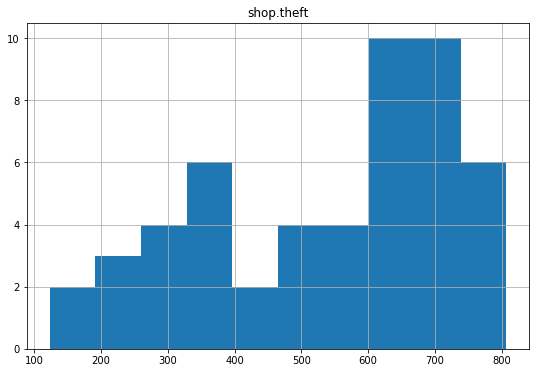

In [17]:
plt.show()

we see that most of the values are between 600 and 700, lets have a look at the average

In [18]:
df['shop.theft'].mean()

540.2941176470588

We can fill the nan with the mean value

In [20]:
df['shop.theft'].fillna(df['shop.theft'].mean(), inplace=True)

After filling the values lets plot over the histogram and see the difference

In [21]:
df.hist(column='shop.theft', figsize=(9,6), bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92e7f71b90>]], dtype=object)

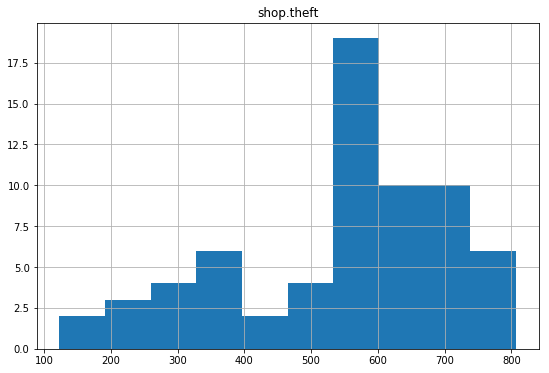

In [22]:
plt.show()

Now for the rest of values we will simply drop all the NAN rows because there only a few of them

In [23]:
df.dropna(axis=0, inplace=True)

Let's check if all NANs were removed

In [24]:
any_nan_cols = df.columns[df.isna().any()]
any_nan_cols

Index([], dtype='object')

Let's look at the number of crimes occuring over the time period in the dataset

In [32]:
plt.figure(figsize=(15,10))
plt.plot(df['Year'],df['crimes.total'])
plt.xlabel('Year')
plt.ylabel('Number of crimes')
plt.legend()

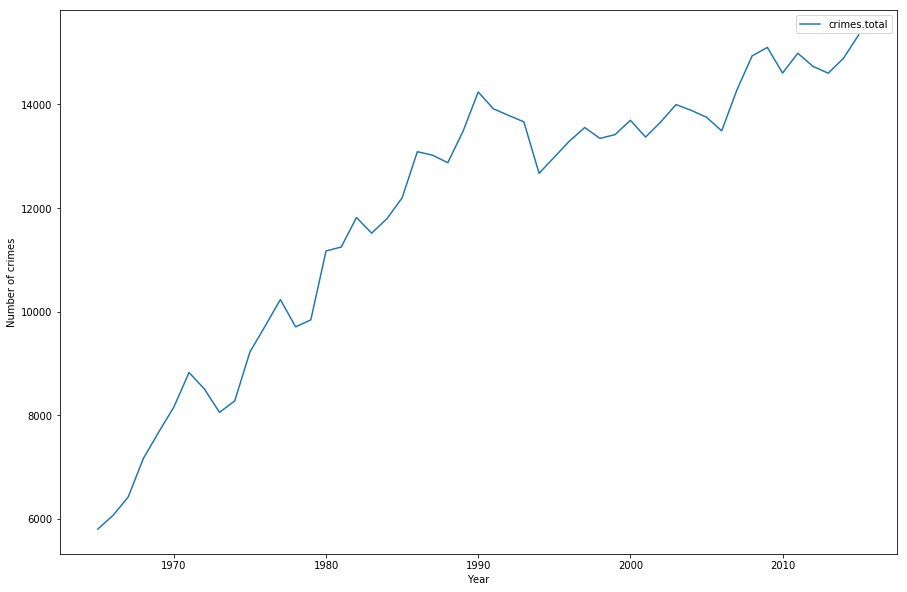

In [33]:
plt.show()

Now let's look at the population over time

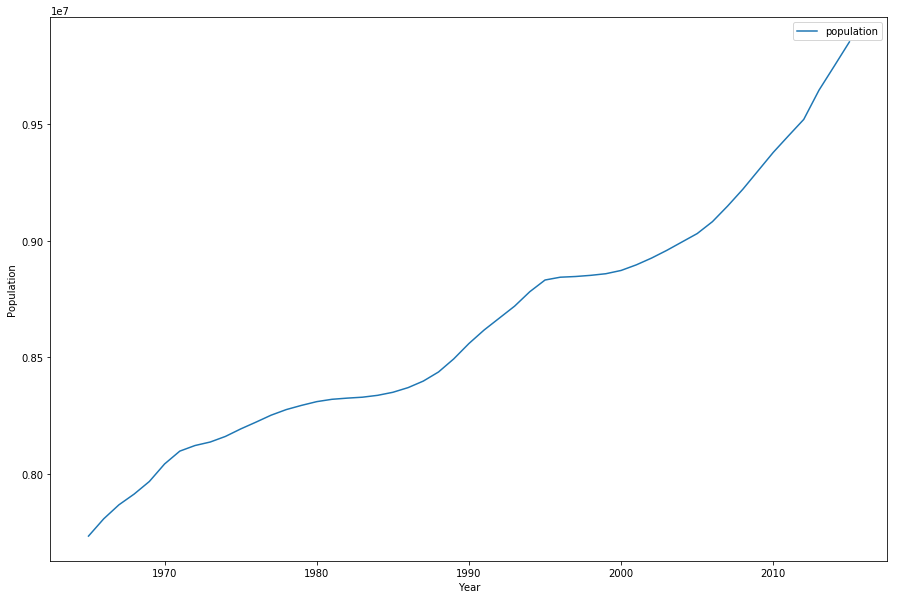

In [36]:
plt.figure(figsize=(15,10))
plt.plot(df['Year'],df['population'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.show()

We see that both increase over time, therefore as population increased so did crime

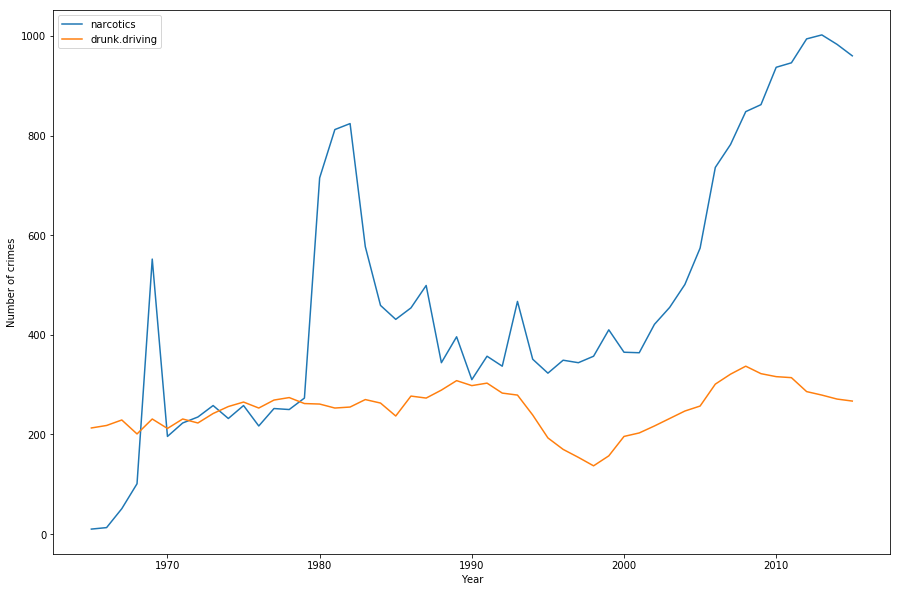

In [38]:
plt.figure(figsize=(15,10))
plt.plot(df['Year'],df['narcotics'])
plt.plot(df['Year'],df['drunk.driving'])
plt.xlabel('Year')
plt.ylabel('Number of crimes')
plt.legend()
plt.show()

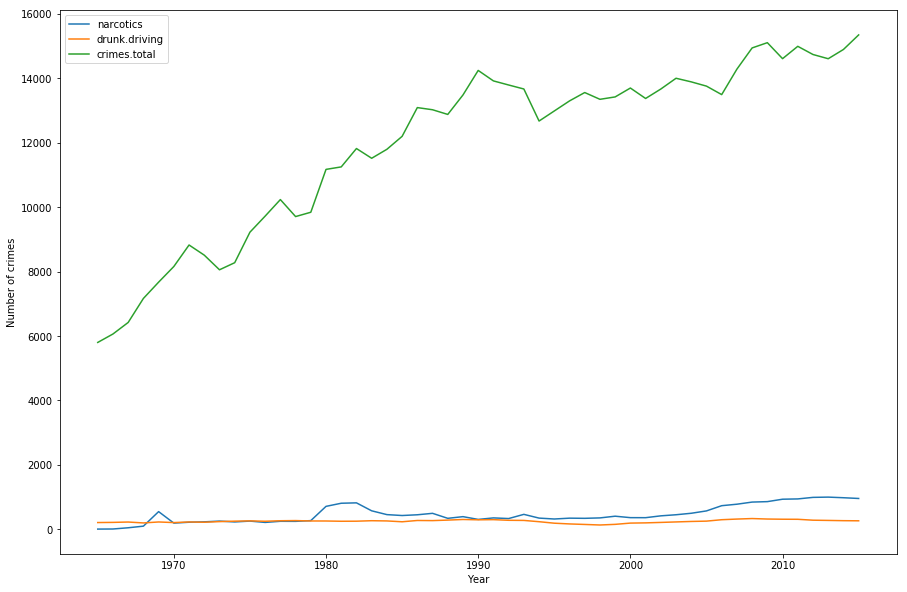

In [40]:
plt.figure(figsize=(15,10))
plt.plot(df['Year'],df['narcotics'])
plt.plot(df['Year'],df['drunk.driving'])
plt.plot(df['Year'],df['crimes.total'])
plt.xlabel('Year')
plt.ylabel('Number of crimes')
plt.legend()
plt.show()